
# Women's Clothing Review Analysis (NLP)

## 1. Import Required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## 2. Load Dataset

In [5]:
df = pd.read_excel(r'G:\My Courses\0. AnalytixLabs\5. Machine Learning, Text Mining and Intro to AI with Python\0. Case Studies\5. Capstone Case Study - NLP- Woman Clothing E-Commerce Platform\Womens Clothing Reviews Data.xlsx')
df.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


## 3. Data Cleaning

In [6]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

df = df.dropna(subset=['review_text', 'recommend_flag'])

df['review_text'] = df['review_text'].astype(str).str.lower()

df.isnull().sum()

product_id           0
category            13
subcategory1        13
subcategory2        13
location             0
channel              0
customer_age         0
review_title      2966
review_text          0
rating               0
recommend_flag       0
dtype: int64

## 4. Exploratory Data Analysis

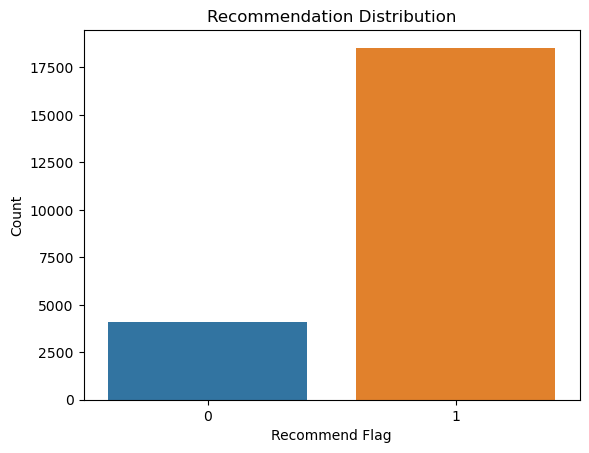

In [7]:
sns.countplot(x='recommend_flag', data=df)
plt.title('Recommendation Distribution')
plt.xlabel('Recommend Flag')
plt.ylabel('Count')
plt.show()


## 5. Text Vectorization

In [8]:
tfidf = TfidfVectorizer(
    lowercase=True,
    stop_words='english',   # Built-in stopwords (no download)
    max_features=8000,
    ngram_range=(1, 2),
    min_df=5
)

X = tfidf.fit_transform(df['review_text'])
y = df['recommend_flag']


## 6. Train-Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


## 7. Model Building (Logistic Regression)

In [10]:
model = LogisticRegression(
    max_iter=2000,
    class_weight='balanced',
    n_jobs=-1
)

model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=2000, n_jobs=-1)

## 8. Model Evaluation

In [11]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8664164274674321
              precision    recall  f1-score   support

           0       0.60      0.82      0.69       820
           1       0.96      0.88      0.91      3709

    accuracy                           0.87      4529
   macro avg       0.78      0.85      0.80      4529
weighted avg       0.89      0.87      0.87      4529



## 9. Confusion Matrix

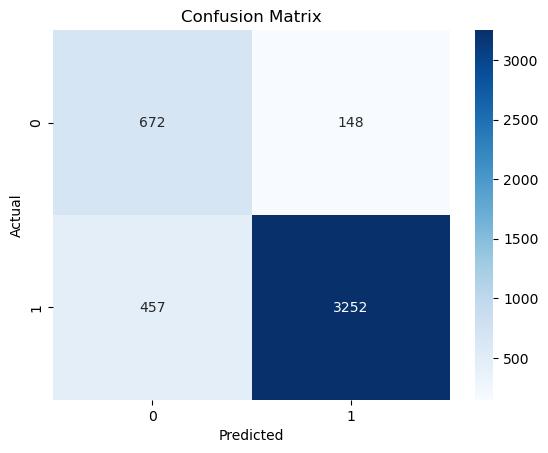

In [12]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## 10. Top Influential Words

In [14]:
feature_names = tfidf.get_feature_names_out()
mean_tfidf = X.mean(axis=0).A1

top_words = sorted(
    zip(feature_names, mean_tfidf),
    key=lambda x: x[1],
    reverse=True
)[:20]

pd.DataFrame(top_words, columns=['Word', 'Importance'])


,Word,Importance
0,dress,0.033535
1,love,0.028599
2,size,0.025982
3,great,0.023065
4,fit,0.022960
5,like,0.022375
6,wear,0.021291
7,just,0.019052
8,fabric,0.017671
9,small,0.017600
